<br><br>

<h1>Human Activity Recognition</h1>
<br>
<h1>Abstract</h1>
<p style="text-indent:2em">The purpose of this project was to predicate a person's activity using data collected from a Samsung Galaxy S II smartphone. 30 Participants between the ages of 19 and 48 were each given a smartphone to wear on their waist. They then each performed 6 activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) while the smartphone took data on its built-in accelerometer and gyroscope.</p>

<p style="text-indent:2em">The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec with a 50% overlap of windows and 128 readings per window. The experiments were video-recorded to manually label the activity performed during each window. Finally, 561 distinct features were analyzed for each window of time.</p>

Each subject's data was then randomly assigned to two data sets: a training data set (21 people) and a test data set (9 people). A variety of different analyses and algorithms were run on the data and a presentation of the major findings is presented below along with various graph visualizations, accuracy results, and the code that produces it. The final algorithm produces an accuracy score of 94% on the test data.

Website with Data Sets: <a href="http://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones">Human Activity Recognition Using Smartphones</a>

# Loading in the Libraries and Data

In [1]:
# Libraries that we know and love.
import numpy as np
import pandas as pd
import matplotlib.pylab as py
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn import svm
from mpl_toolkits.mplot3d import axes3d
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
# Enable matplot for visuals
%matplotlib inline
py.show()

In [3]:
#### LOAD TRAINING DATA ####

# Load the data from the file
Xdata = pd.read_csv('UCI HAR Dataset/train/X_train.txt',header=None,delim_whitespace=True)

# Load the corresponding activity values for each window

# Activity Values corresponding to activities with color distinction for graphs below
# "1" WALKING Green
# "2" WALKING_UPSTAIRS Cyan
# "3" WALKING_DOWNSTAIRS Magenta
# "4" SITTING Black
# "5" STANDING Red
# "6" LAYING Blue
ydata = pd.read_csv('UCI HAR Dataset/train/y_train.txt',header=None)

# Store the Data and classifications into Numpy arrays
Xinit = np.array(Xdata.iloc[:, :])
yinit = np.array(ydata.iloc[:,0])

# The subjects (of the 30) that correspond to each window of Xinit
Subjectdata = pd.read_csv('UCI HAR Dataset/train/subject_train.txt',header=None)
Subjectinit = np.array(Subjectdata.iloc[:, 0]);

# The 21 Values of the subjects that are part of the test data 
testSubjects=[1,3,5,6,7,8,11,14,15,16,17,19,21,22,23,25,26,27,28,29,30]

In [4]:
#### LOAD TEST DATA ####

# Load the data from the file
XdataTEST = pd.read_csv('UCI HAR Dataset/test/X_test.txt',header=None,delim_whitespace=True)

# Load the corresponding activity values for each window
ydataTEST = pd.read_csv('UCI HAR Dataset/test/y_test.txt',header=None)

# Store the Data and classifications into Numpy arrays
XinitTEST = np.array(XdataTEST.iloc[:, :])
yinitTEST = np.array(ydataTEST.iloc[:,0])

<h1> Principle Component Analysis and Support Vector Machines</h1>

The first major finding is done using an unsupervised PCA analysis of the data. We reduce the number of dimensions from 561 to 3 and realize that a large amount of the data can be explained by following the three eigenvectors corresponding to the largest eigenvalues of the covariance matrix. In particular the values of the data along the first and third eigenvectors can be used to differentiate between movement and non-movement with 99.9% accuracy using a Support Vector Machine (SVM) algorithm. (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS versus SITTING, STANDING, LAYING). Below we show a 2D plot of the data points from the training set with corresponding SVM boundary. We also include the one data point that is misclassified from the test data set under this model.

The 2nd eigenvector in the PCA does further separate the data particularly among the 3 different walking sets. However, it does not tend to separate the differences between movement and non-movement. The effects of viewing the data projected onto these eigenvectors

In [5]:
#### Create Moving Arrays ####

# Initialize Numpy Arrays to 0 which will represent No Movement
isMoving=np.zeros(len(Xinit))
isMovingTEST=np.zeros(len(XinitTEST))

# Convert those rows corresponding to Movement (Walking) to 1 in both the 
isMoving[yinit==1]=1
isMoving[yinit==2]=1
isMoving[yinit==3]=1
isMovingTEST[yinitTEST==1]=1
isMovingTEST[yinitTEST==2]=1
isMovingTEST[yinitTEST==3]=1

In [6]:
# Perform PCA on the training data and then transform both 
# the training data and test data along the corresponding  
# first 3 eigenvectors of the analysis.                    
MovePCA=PCA(n_components=3).fit(Xinit)
PCATraindata=MovePCA.transform(Xinit)
PCATestdata=MovePCA.transform(XinitTEST)

In [7]:
# Create an SVM Classifier and fit it to the 1st and 3rd eigenvector
# values.
SVMMoveClassifier=svm.SVC(gamma=.9)
SVMMoveClassifier.fit(PCATraindata[:,[0,2]],isMoving)

# Compute the accuracy Results
print("SVM Training Accuracy Score: ", SVMMoveClassifier.score(PCATraindata[:,[0,2]],isMoving))
print("SVM Test Accuracy Score: ", SVMMoveClassifier.score(PCATestdata[:,[0,2]],isMovingTEST))

SVM Training Accuracy Score:  0.99986398259
SVM Test Accuracy Score:  0.99966067187


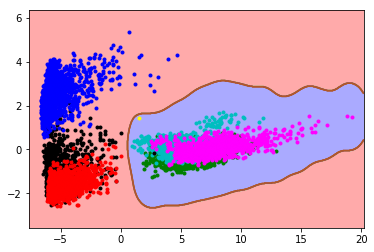

In [8]:
#### Plot the Training Data ####
py.plot(PCATraindata[yinit==1,0],PCATraindata[yinit==1,2],'g.') # Walking (Green)
py.plot(PCATraindata[yinit==2,0],PCATraindata[yinit==2,2],'c.') # Walking_Upstairs (Cyan)
py.plot(PCATraindata[yinit==3,0],PCATraindata[yinit==3,2],
        color='magenta',marker='.', linestyle='None')           # Walking_Downstairs (Magenta)
py.plot(PCATraindata[yinit==4,0],PCATraindata[yinit==4,2],'k.') # Sitting (Black)
py.plot(PCATraindata[yinit==5,0],PCATraindata[yinit==5,2],'r.') # Standing (Red)
py.plot(PCATraindata[yinit==6,0],PCATraindata[yinit==6,2],'b.') # Laying Down (Blue)

# Plot the one "Test" Sitting point which was misclassified in Yellow
py.plot(PCATestdata[792,0],PCATestdata[792,2], color='yellow',
        marker='.', linestyle='None')                           

#### Plot the SVM boundary ####

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = PCATraindata[:,0].min() - 1, PCATraindata[:,0].max() + 1
y_min, y_max = PCATraindata[:,2].min() - 1, PCATraindata[:,2].max() + 1

# Step size for the grid and grid creation
h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))

# Classify the grid into the 2 classes
Z = SVMMoveClassifier.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot and add a contour boundary
Z = Z.reshape(xx.shape)
py.figure(1, figsize=(8, 6))
py.pcolormesh(xx, yy, Z, cmap=ListedColormap(['#FFAAAA','#AAAAFF']))
py.contour(xx, yy, Z, cmap=py.cm.Paired);

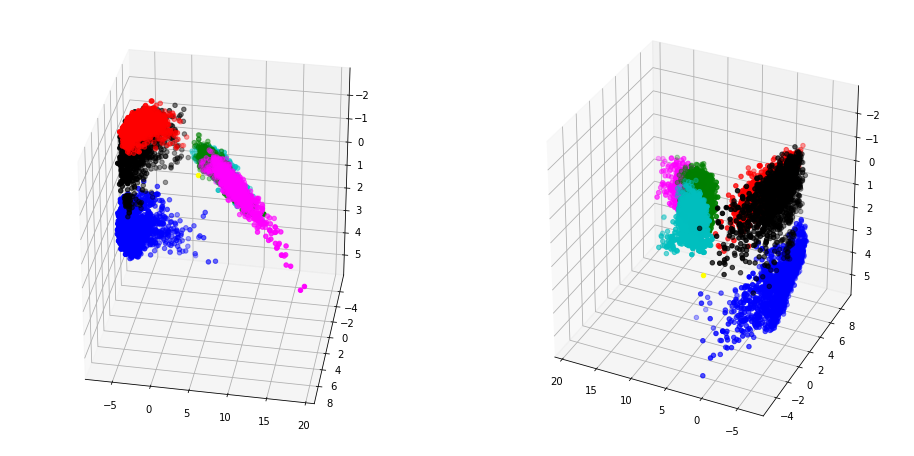

In [9]:
# The projection of the data onto the eigenspace formed by the first three eigenvectors
# seen from 2 different angles.
fig = py.figure(1, figsize=(16, 8))

# The scatter plot of the 6 types of acitivities and 1 misclassified point from the test data set. (VIEW 1)
bx = fig.add_subplot(1,2,1,projection='3d',elev=-150, azim=-100)

bx.scatter(PCATraindata[yinit==1,0],PCATraindata[yinit==1,1],PCATraindata[yinit==1,2],c='g') #Green Walking
bx.scatter(PCATraindata[yinit==2,0],PCATraindata[yinit==2,1],PCATraindata[yinit==2,2],c='c') #Cyan Walking Up
bx.scatter(PCATraindata[yinit==3,0],PCATraindata[yinit==3,1],                                #Magenta Walking down
           PCATraindata[yinit==3,2],c='magenta') 
bx.scatter(PCATraindata[yinit==4,0],PCATraindata[yinit==4,1],PCATraindata[yinit==4,2],c='k') #Black Sitting
bx.scatter(PCATraindata[yinit==5,0],PCATraindata[yinit==5,1],PCATraindata[yinit==5,2],c='r') #Red Standing
bx.scatter(PCATraindata[yinit==6,0],PCATraindata[yinit==6,1],PCATraindata[yinit==6,2],c='b') #Blue Laying down
bx.scatter(PCATestdata[792,0],PCATestdata[792,1],PCATestdata[792,2], c='yellow') # 1 Yellow Test point Misclassified

# The scatter plot of the 6 types of acitivities and 1 misclassified point from the test data set. (VIEW 1)
bx = fig.add_subplot(1,2,2,projection='3d', elev=-150, azim=65)

bx.scatter(PCATraindata[yinit==1,0],PCATraindata[yinit==1,1],PCATraindata[yinit==1,2],c='g') #Green Walking
bx.scatter(PCATraindata[yinit==2,0],PCATraindata[yinit==2,1],PCATraindata[yinit==2,2],c='c') #Cyan Walking Up
bx.scatter(PCATraindata[yinit==3,0],PCATraindata[yinit==3,1],                                #Magenta Walking down
           PCATraindata[yinit==3,2],c='magenta') 
bx.scatter(PCATraindata[yinit==4,0],PCATraindata[yinit==4,1],PCATraindata[yinit==4,2],c='k') #Black Sitting
bx.scatter(PCATraindata[yinit==5,0],PCATraindata[yinit==5,1],PCATraindata[yinit==5,2],c='r') #Red Standing
bx.scatter(PCATraindata[yinit==6,0],PCATraindata[yinit==6,1],PCATraindata[yinit==6,2],c='b') #Blue Laying down
bx.scatter(PCATestdata[792,0],PCATestdata[792,1],PCATestdata[792,2], c='yellow'); # 1 Yellow Test point Misclassified

<h1> Stochastic Gradient Boosting </h1>

<p style="text-indent:2em">One of the best techniques out there for creating accurate prediction models is through the ensemble technique of Gradient Boosting. In fact we need not split the data into Moving and Non-Moving predictions through SVM before building the Classifier. As you see through the short piece of code the accuracy of the model on the Test data is 94%. Through some tweaking with regard to cross-validating on the training data and tweaking of the inputs to the Classifier itself the accuracy may be pushed slightly higher; however, this is most likely just beginning to fit on the Test data itself. Thus, we leave the simple code below.

In [10]:
#### Gradient Boosting Classifier ####
GBC=GradientBoostingClassifier(n_estimators=150, random_state=0, learning_rate=.2)
GBC=GBC.fit(Xinit,yinit)

# Accuracy Score
print("Accuracy Score on the Test Data: ", GBC.score(XinitTEST,yinitTEST))

Accuracy Score on the Test Data:  0.941635561588


<h1>Other Methods Discussion</h1>

<p style="text-indent:2em"> A variety of techniques were attempted on this problem to maximize accuracy and other models performed similarly but not as well as the Gradient Boosting Technique. Three other ensemble techniques were performed on the data: Bagging with K-Nearest Neighbors, Bagging with Decision Trees, and Boosting with Adaboost. These produced accuracy results between 89-92% accuracy results. Classifying via SVM (to separate into all 6 categories) produced accuracy results around 86%.